# Logistic Regression for student pass or fail 

In general, a binary logistic regression describes the relationship between the dependent binary variable and one or more independent variable/s.

The binary dependent variable has two possible outcomes:                           
Marks < 33 - Fail, otherwise pass

1--- for Pass/success

2--- for fail/failure

In [4]:
import pandas as pd
from dateutil import parser                   
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Parser : This module offers a generic date/time string parser which is able to parse most known formats to represent a date and/or time.

In [5]:
df=pd.read_csv("result.csv")                  #load the data set

In [6]:
df

,marks,result
0,30,0
1,20,0
2,50,1
3,40,1
4,86,1
5,54,1
6,78,1
7,89,1
8,99,1
9,87,1


Text(0, 0.5, '( Result )')

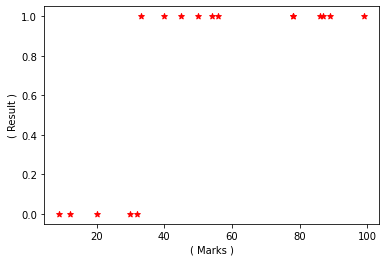

In [7]:
plt.scatter(df.marks,df.result,marker="*",color='red')
plt.xlabel("( Marks )")
plt.ylabel("( Result )")

In [8]:
df.shape         #by this we have to know how many rows and coloum in our dataset rows-17 coloumn-2

(17, 2)

In [9]:
from sklearn.model_selection import train_test_split            #we have to split our data in train and test

In [10]:
X_train,X_test,y_train,y_test=train_test_split(df[["marks"]],df.result,test_size=0.2)

In [11]:
X_test

,marks
11,78
13,12
7,89
15,45


In [12]:
X_train

,marks
4,86
3,40
14,32
0,30
8,99
9,87
1,20
5,54
16,9
10,56


In [13]:
y_test

11    1
13    0
7     1
15    1
Name: result, dtype: int64

In [14]:
y_train

4     1
3     1
14    0
0     0
8     1
9     1
1     0
5     1
16    0
10    1
6     1
12    1
2     1
Name: result, dtype: int64

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model=LogisticRegression()

In [17]:
model.fit(X_train,y_train)

LogisticRegression()

In [18]:
model.predict(X_test)

array([1, 0, 1, 1], dtype=int64)

In [19]:
model.score(X_test,y_test)

1.0

In [20]:
model.predict_proba(X_test)

array([[3.99680289e-15, 1.00000000e+00],
       [9.99999762e-01, 2.37521392e-07],
       [0.00000000e+00, 1.00000000e+00],
       [1.31181130e-04, 9.99868819e-01]])

In [23]:
model.predict([[12]])                    #predict the result according to given marks

array([0], dtype=int64)

In [33]:
model.coef_                     #it shows the value of 'm' slope

array([[0.7330851]])

In [28]:
model.intercept_

array([-24.05002909])

Now It's time to apply sigmoid function of give data

In [32]:
import math
def sigmoid(x):
    return 1/(1+math.exp(-x))

In [35]:
def predict_fun(marks):
    y=0.7330851*marks+(-24.05002909)                   # y=m*x+c   where 'm' & 'c' we have alredy calculated
    a=sigmoid(y)
    return a

In [44]:
marks=40
predict_fun(40)

0.9948998641174317

# if marks > 33 --PASS              here 0.9948 is greater than 0.5 means student will be [pass]

In [45]:
marks=23
predict_fun(23)

0.0007542201211567286

# here 0.00075  is less than 0.5 hence student will be [fail]